# Wess Zumino 

## N=1 in 1+1

The Hamiltonian with a central difference for the derivative is given by 

\begin{align}
    H=\sum_n&\left[ \frac{p_n^2}{2a} + \frac{a}{2}\left(\frac{\phi_{n+1}-\phi_{n-1}}{2a}\right)^2+\frac{a}{2}V(\phi_n)^2
            +aV(\phi_n)\frac{\phi_{n+1}-\phi_{n-1}}{2a} \right. \nonumber \\
            &\left.+(-1)^nV'(\phi_n)\left(\chi_n^{\dagger}\chi_n-\frac{1}{2}\right)
            +\frac{1}{2a}\left(\chi_n^{\dagger}\chi_{n+1}+\chi_{n+1}^{\dagger}\chi_n\right) \right],
\end{align}

In [1]:
import sympy as sp
from ham_to_sparse_matrix import *
from constants import *
import scipy.sparse.linalg

In [2]:
bosonNI=sp.expand( pn**2/(2*aLat) + (aLat/2)*((qnP1-qnM1)/(2*aLat))**2 )
bosonI=sp.expand( (aLat/2)*V(qn)**2 + aLat*V(qn)*(qnP1-qnM1)/(4*aLat) + aLat*(qnP1-qnM1)*V(qn)/(4*aLat) )
fermionNI=sp.expand( -(xdnP1*xn+xdn*xnP1)/(2*aLat) )
fermionI=sp.expand( sp.diff(V(qn),qn)*(xdn*xn-(1/2)) )

In [3]:
bosonNI+bosonI

a*V(q_{n})**2/2 + q_{n+1}*V(q_{n})/4 - q_{n-1}*V(q_{n})/4 + V(q_{n})*q_{n+1}/4 - V(q_{n})*q_{n-1}/4 + p_{n}**2/(2*a) - q_{n+1}*q_{n-1}/(8*a) + q_{n+1}**2/(8*a) - q_{n-1}*q_{n+1}/(8*a) + q_{n-1}**2/(8*a)

In [4]:
fermionNI + fermionI

-0.5*Derivative(V(q_{n}), q_{n}) + Derivative(V(q_{n}), q_{n})*\chi^{\dagger}_{n}*\chi_{n} - \chi^{\dagger}_{n+1}*\chi_{n}/(2*a) - \chi^{\dagger}_{n}*\chi_{n+1}/(2*a)

In [11]:
N=4
aVal=1

# depends on finite-difference method
qs=[SiteSymbol('q',str(i)) for i in range(-1,N+1,1)]
# maybe make qs a normal site list
# and make an extra boundaryQs list for q[-1], q[N]
# counting would be normal computer science way for rest of code.

ps=[SiteSymbol('p',str(i)) for i in range(-1,N+1,1)] # don't really need extras
aops=[SiteSymbol('a',str(i)) for i in range(-1,N+1,1)]
adags=[SiteSymbol('a^{\dagger}',str(i)) for i in range(-1,N+1,1)]
xs=[SiteSymbol('\chi',str(i)) for i in range(-1,N+1,1)]
xdags=[SiteSymbol('\chi^{\dagger}',str(i)) for i in range(-1,N+1,1)]

# note this is exactly hardcoded for this finite difference method.
bcType = 'dirichlet'
boundaryConditions = {}
if bcType == 'periodic':
    boundaryConditions = {qs[0]: qs[N], qs[N+1]: qs[1],
                          xs[0]: xs[N], xs[N+1]: xs[1], 
                          xdags[0]: xdags[N],  xdags[N+1]: xdags[1]
                         }
    
elif bcType == 'dirichlet':
    boundaryConditions = { qs[0]: 0, qs[N+1]: 0,
                          xs[0]: 0, xs[N+1]: 0,
                          xdags[0]: 0, xdags[N+1]:0
                         }

In [12]:
totHam=bosonNI+bosonI+fermionNI+fermionI
totHam

a*V(q_{n})**2/2 + q_{n+1}*V(q_{n})/4 - q_{n-1}*V(q_{n})/4 + V(q_{n})*q_{n+1}/4 - V(q_{n})*q_{n-1}/4 - 0.5*Derivative(V(q_{n}), q_{n}) + Derivative(V(q_{n}), q_{n})*\chi^{\dagger}_{n}*\chi_{n} - \chi^{\dagger}_{n+1}*\chi_{n}/(2*a) - \chi^{\dagger}_{n}*\chi_{n+1}/(2*a) + p_{n}**2/(2*a) - q_{n+1}*q_{n-1}/(8*a) + q_{n+1}**2/(8*a) - q_{n-1}*q_{n+1}/(8*a) + q_{n-1}**2/(8*a)

In [13]:
ham=0

m=1

for i in range(1,N+1):
    ham+=(bosonNI+bosonI+fermionNI).subs({
        pn: ps[i],
        qn: qs[i], qnP1: qs[i+1], qnM1: qs[i-1],
        xn: xs[i], xnP1: xs[i+1],
        xdn: xdags[i], xdnP1: xdags[i+1]
    }).subs(boundaryConditions)
    
# ham.subs(boundaryConditions).doit() # this doesn't work?


def potential(n):
    return m*qs[n]

potentialSubs={}
for n in range(1,N+1):
    potentialSubs[V(qs[n])]=potential(n)

ham=sp.simplify(ham.subs(potentialSubs).subs(aLat,aVal))

for i in range(1,N+1):
    if i%2==0:
        ham+=sp.simplify(fermionI.subs({qn: qs[i], xn: xs[i], xdn: xdags[i]}).subs(potentialSubs))
    else:
        ham-=sp.simplify(fermionI.subs({qn: qs[i], xn: xs[i], xdn: xdags[i]}).subs(potentialSubs))
ham=sp.simplify(ham.subs(aLat,aVal))
ham

(-8*\chi^{\dagger}_{0}*\chi_{0} - 4*\chi^{\dagger}_{0}*\chi_{1} - 4*\chi^{\dagger}_{1}*\chi_{0} + 8*\chi^{\dagger}_{1}*\chi_{1} - 4*\chi^{\dagger}_{1}*\chi_{2} - 4*\chi^{\dagger}_{2}*\chi_{1} - 8*\chi^{\dagger}_{2}*\chi_{2} - 4*\chi^{\dagger}_{2}*\chi_{3} - 4*\chi^{\dagger}_{3}*\chi_{2} + 8*\chi^{\dagger}_{3}*\chi_{3} + 4*p_{0}**2 + 4*p_{1}**2 + 4*p_{2}**2 + 4*p_{3}**2 - q_{0}*q_{2} + 5*q_{0}**2 - q_{1}*q_{3} + 6*q_{1}**2 - q_{2}*q_{0} + 6*q_{2}**2 - q_{3}*q_{1} + 5*q_{3}**2)/8

In [14]:
m=1

HOdofSubs = {}
#offset because of BC
for i in range(1,N+1):
    HOdofSubs[qs[i]] = 0.5*sp.sqrt(2/m)*(aops[i] + adags[i])
    HOdofSubs[ps[i]] = complex(0,1)*sp.sqrt(2*m)*(adags[i] - aops[i])/2 

hoHam=sp.expand(ham.subs(HOdofSubs))
hoHam=sp.nsimplify(hoHam,tolerance=1e-8)
hoHam

-\chi^{\dagger}_{0}*\chi_{0} - \chi^{\dagger}_{0}*\chi_{1}/2 - \chi^{\dagger}_{1}*\chi_{0}/2 + \chi^{\dagger}_{1}*\chi_{1} - \chi^{\dagger}_{1}*\chi_{2}/2 - \chi^{\dagger}_{2}*\chi_{1}/2 - \chi^{\dagger}_{2}*\chi_{2} - \chi^{\dagger}_{2}*\chi_{3}/2 - \chi^{\dagger}_{3}*\chi_{2}/2 + \chi^{\dagger}_{3}*\chi_{3} - a^{\dagger}_{0}*a^{\dagger}_{2}/16 + 9*a^{\dagger}_{0}*a_{0}/16 - a^{\dagger}_{0}*a_{2}/16 + a^{\dagger}_{0}**2/16 - a^{\dagger}_{1}*a^{\dagger}_{3}/16 + 5*a^{\dagger}_{1}*a_{1}/8 - a^{\dagger}_{1}*a_{3}/16 + a^{\dagger}_{1}**2/8 - a^{\dagger}_{2}*a^{\dagger}_{0}/16 - a^{\dagger}_{2}*a_{0}/16 + 5*a^{\dagger}_{2}*a_{2}/8 + a^{\dagger}_{2}**2/8 - a^{\dagger}_{3}*a^{\dagger}_{1}/16 - a^{\dagger}_{3}*a_{1}/16 + 9*a^{\dagger}_{3}*a_{3}/16 + a^{\dagger}_{3}**2/16 + 9*a_{0}*a^{\dagger}_{0}/16 - a_{0}*a^{\dagger}_{2}/16 - a_{0}*a_{2}/16 + a_{0}**2/16 + 5*a_{1}*a^{\dagger}_{1}/8 - a_{1}*a^{\dagger}_{3}/16 - a_{1}*a_{3}/16 + a_{1}**2/8 - a_{2}*a^{\dagger}_{0}/16 + 5*a_{2}*a^{\dagger}_{2}/

In [15]:
for cutoff in [2,3,4,5,6]:
    t=Timer('toHam')
    t.start()
    hamMat=convert_to_matrix(hoHam,cutoff,N,aops,adags,xs,xdags)
    t.stop()
    
    t=Timer('evals')
    t.start()
    ens=scipy.sparse.linalg.eigs(hamMat,k=10,which='SM')[0]
    t.stop()
    
    print("Lambda = ",cutoff)
    print(ens)
    print()

toHam timer took: 0.8087 seconds
evals timer took: 0.0281 seconds
Lambda =  2
[-0.20793517+2.3420306e-08j -0.20793463+5.1042086e-09j
  0.04206645+7.1001307e-09j  0.04206563-7.1215567e-09j
  0.04206554-2.1054802e-10j  0.04206564-1.0077201e-08j
  0.04206583-5.0142099e-09j  0.04206561-1.6517861e-08j
  0.04206579+1.6105975e-08j  0.04206587+1.0045709e-09j]

toHam timer took: 2.9633 seconds
evals timer took: 0.0358 seconds
Lambda =  3
[-0.08112273-2.3380368e-08j  0.5010547 +2.4898526e-08j
  0.62391347+2.1311823e-09j  0.5010537 +2.0337936e-08j
  0.62391156-2.5714314e-08j  0.96554   -6.5442736e-09j
  1.0832345 +6.6134098e-09j  1.0093178 +2.1927621e-08j
  0.9655376 -8.8726262e-09j  1.0093127 -1.5163849e-08j]

toHam timer took: 12.4039 seconds
evals timer took: 0.1795 seconds
Lambda =  4
[-6.4390719e-05-9.5022001e-10j  1.0278510e+00+3.9929205e-08j
  1.0466034e+00+2.1655687e-08j  8.9896494e-01+1.7519444e-08j
  8.9896244e-01-1.6733281e-09j  1.0278454e+00-1.0380506e-08j
  1.0465991e+00+2.5614799e-0

In [3]:
e0raw=[-0.20793517, -0.081123, -6.4391*10e-5, -5.7286*10e-4, -6.3292*10e-7]

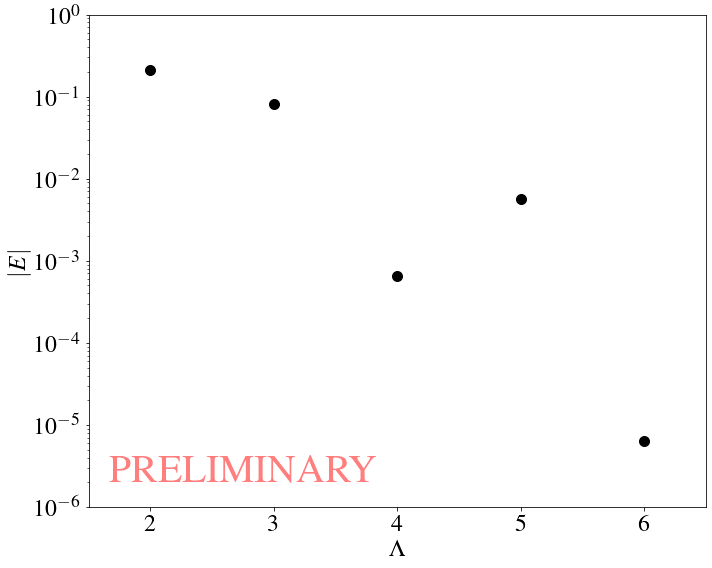

In [22]:
import matplotlib.pyplot as plt

import matplotlib 
#matplotlib.use("Agg")

fig, ax = plt.subplots()

plt.style.use("paper.mplstyle")

plt.scatter([x for x in range(2,7)],[abs(en) for en in e0raw], c='black')
plt.yscale('log')

plt.xlabel('$\\Lambda$')
plt.ylabel('$|E|$')

plt.xlim(1.5,6.5)
plt.ylim(1e-6,1e0)
plt.yscale('log')

ax.text(0.25, 0.07, 'PRELIMINARY', transform=ax.transAxes,
        fontsize=40, color='red', alpha=0.5,
        ha='center', va='center', rotation='0')
plt.savefig('PLOTS/WZ_4site_vq1.pdf',bbox_inches='tight')

In [ ]:
cutoff=4
t=Timer('toHam')
t.start()
hamMat=convert_to_matrix(hoHam,cutoff,N,aops,adags,xs,xdags)
t.stop()

In [10]:
eigSys=np.linalg.eig(hamMat.toarray())

In [11]:
np.sort(eigSys[0])[0:10]

array([-0.00145834-1.03461085e-29j,  0.82856256+8.47187861e-24j,
        0.82856256+2.16843867e-18j,  1.0798419 -6.61307837e-21j,
        1.0798419 +2.84874121e-17j,  1.1880103 +1.55096365e-25j,
        1.1880103 +3.75364079e-25j,  1.1880103 +1.38750589e-17j,
        1.1880103 +2.73882710e-17j,  1.3857785 +7.23263674e-33j],
      dtype=complex64)